# EE 538: Analog Integrated Circuit Design
Winter 2021

Instructor: Jason Silver

## EE 538 basics I

 - Instructor
     - Jason Silver
     - Office hours TBD via Google poll
 - Teaching assistant
     - Thushara Maria Xavier
     - Office hours TBD
 - Web page: [EE 538 Winter 2021 (Canvas)](https://canvas.uw.edu/courses/1448967)
     - Access assignments, grades, and solutions
 - Slack
     - [EE 538 Winter 2021 Slack workspace](https://join.slack.com/t/uwaic2021/shared_invite/zt-k8e4c07p-6mkI7JSqfLv_lYJ21zW2ZQ)
     - Use Slack to ask questions about assignments and projects
     - Participation in online discussion benefits everyone!
     
         

## EE 538 basics II

 - There are no official prerequisites, but it will be helpful to have some familiarity with
     - Elementary circuit theory
        - KVL, KCL, Thevenin equivalent circuits, Laplace/Fourier transforms
     - Semiconductor device operation and circuit analysis 
         - Diodes, FETs, BJTs
     - Basic linear systems
         - Frequency response, poles, zeros, Bode plots
     - Circuit simulation with some flavor of SPICE (__S__imulation __P__rogram with __I__ntegrated __C__ircuit __E__mphasis)
 
         
         

## About your instructor

 - PhD from UW EE in 2015
     - Low power integrated circuit (IC) design for bioelectrical interfaces
         - EEG, EMG, neural recording
     - Focus on optimizing for power efficiency
 - 13 years experience designing ICs and systems for academia and industry
     - Mixed-signal design for biomedical applications
 - Current full-time role
     - Director of Hardware and Biosystems Engineering at Curi Bio
         - Formerly housed in UW CoMotion startup incubator (Fluke Hall)
         - Instrumentation for *in vitro* cell studies

## Course breakdown

- Weekly Assignments (40%)
    - Typically assigned Saturday, submitted online the Sunday of the following week
- Design project (40%)
    - Analog IC design project using Cadence tools
    - Optimization for performance, power, cost
- Midterm exam (20%)
    - Single exam covering approximately half of the course material
    - "Take-home" format, submitted online


## Course learning goals

 - Develop deeper understanding of MOS transistor behavior relevant to analog (and some digital) design
 - Develop intuition w.r.t. tradeoffs in analog circuits (speed, noise, power dissipation)
 - Learn to bridge the gap between complex device models/behavior and “back-of-the-envelope” calculations
 - Develop a systematic approach to circuit analysis and design

## Course topics

 - CMOS technology and device models
 - Single-stage amplifiers
 - Current mirrors, active loads
 - Differential pairs
 - Operational transconductance amplifiers (OTAs)
 - Feedback, stability, and compensation

## Software and CAD 

 - We will use Cadence for circuit simulation
     - Tutorial following today's lecture
 - Design, data analysis, and results plotting using Python/Jupyter Notebooks
    - Design scripts iterable and reusable
    - More flexible than Cadence native plotting functions
    - Lecture examples created using Python/Jupyter Notebooks

## SPICE design methodology

 - SPICE is a numerical simulation tool that enables you to evaluate circuit ideas
 - General rule: Don't simulate something you don't already (mostly) understand
    - SPICE is for verification only!
 - Neither analytical nor simulation models provide a complete picture of reality
     - Understanding model limitations is crucial to building successful circuits and systems

## JupyterHub

 - Jupyter Hub enables execution of Python code without the need for installation/maintenance of packages, etc
 - Lecture notes/slides will be made available in student directories several days prior to lecture
 - [EE538 Jupyter Hub Server](https://rttl.axdd.s.uw.edu/2021-winter-e-e-538-c)
 - Please log out of the server when you're not using it!
 

## Python packages/modules

In [7]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

# Lecture 1 - MOS Physics and Operation

## MOS transistor

<center><img src="MOS_structure.png" width=700 /></center>

 - MOSFET: __Metal__-__O__xide-__S__emiconductor __F__ield __E__ffect __T__ransistor
 - CMOS: __C__omplementary __MOS__ (NMOS and PMOS in a single process)
 - n-type transistors (NMOS) consist of p-doped bulk, n-doped source/drain, polysilicon gate, and SiO2 insulating layer
 - p-type transistors (PMOS) have n-doped bulk, p-doped source/drain

## NMOS operation

<center><img src="NMOS_operation.png" width=600 /></center>

 - Inversion layer forms as minority carriers are drawn from bulk to interface
 - Threshold voltage ($V_{th}$) defined as the $V_{GS}$ value at which the minority carrier (electron) concentration equals that of the majority carriers (holes)

## NMOS operation

<center><img src="NMOS_operation.png" width=600 /></center>

 - Current is controlled by the mobile charge in the channel
 - Vertical electric field controls charge density
 - Carrier velocity proportional to lateral electric field ($v=\mu E_{lateral}$)
 - Goal: Calculate drain current as a function of $V_{gs}$ and $V_{ds}$

## Vertical field 

<center><img src="MOS_vertical_field.png" width=500 /></center>

\begin{equation}
C_{ox} = \dfrac{\epsilon_{ox}}{t_{ox}}
\end{equation}

\begin{equation}
Q(y) = C_{ox}[V_{gs} - V_{th} - V(y)]
\end{equation}

 - $C_{ox}$: Oxide capacitance, in $F/m^2$
 - Charge per unit area, $Q(y)$, depends on $V_{gs} - V_{th}$, $\epsilon_{ox}$, and $t_{ox}$
 - Vertical electric field controls charge density

## Lateral field

<center><img src="MOS_lateral_field.png" width=400 /></center>

\begin{equation}
I = Q(y) \cdot v
\end{equation}

\begin{equation}
v = \mu \cdot E
\end{equation}

\begin{equation}
E = \dfrac{dV(y)}{dy}
\end{equation}

 - Current controlled by charge density, mobility, and applied voltage
 - Lateral electric field controls charge velocity

## First-order I-V characteristics

<center><img src="MOS_IV_cross_section.png" width=700 /></center>

\begin{equation}
Q_n(y) = C_{ox}[V_{gs} - V_{th} - V(y)]
\end{equation}

\begin{equation}
v = \mu \cdot E
\end{equation}

\begin{align}
I_d &= Q_n \cdot v \cdot W \\
\\
&= C_{ox}[V_{gs} - V_{th} - V(y)] \cdot \mu \cdot E \cdot W \\
\end{align}



## MOS I-V derivation

\begin{align}
I_d &= C_{ox}[V_{gs} - V_{th} - V(y)] \cdot \mu \cdot E \cdot W \\
\\
I_d \cdot dy &= \mu \cdot C_{ox} \cdot W [V_{gs} - V_{th} - V(y)]\cdot dV \\
\\
I_d \int_0^L{dy} &= \mu \cdot C_{ox} \cdot W  \int_0^{V_{ds}}{[V_{gs} - V_{th} - V(y)]\cdot dV}\\
\end{align}

$$\boxed{I_d = \mu \cdot C_{ox} \cdot \dfrac{W}{L} {\left[(V_{gs} - V_{th}) - \dfrac{V_{ds}}{2}\right]\cdot V_{ds}}} $$

 - Let's plot this function...

In [15]:
u_n = 350                 # electron mobility (device parameter)
e_ox = 3.9*8.854e-12/100; # relative permittivity
t_ox = 9e-9*100;          # oxide thickness
C_ox = e_ox/t_ox          # oxide capacitance
V_th = 0.7                # threshold voltage (device parameter)
W = 100                   # device width in microns
L = 1                     # device length in microns

V_ds = np.arange(0,2.7,step=0.05)
V_gs = 2
I_d = u_n*C_ox*(W/L)*(V_gs - V_th - V_ds/2)*V_ds 

In [16]:
plot_xy(V_ds, I_d, r'$V_{ds} [V]$', '$I_d [A]$')

 - $I_d$ appears to be decreasing for $V_{ds} > V_{gs} - V_{th}$ 
 - What really happens when $V_{ds} > V_{gs} - V_{th}$?
 - When the potential near the drain region is high enough such that $V_{gd} = V_{gs} - V_{ds} < V_{th}$, the inversion charge becomes zero

## First-order I-V characteristics, revisited

<center><img src="NMOS_pinch_off.png" width=600 /></center>

 - Near the drain region, charge density is dependent on $V_{gd}$, not $V_{gs}$
 - Absence of inversion charge results in high $E$-field region, across which the excess $V_{ds}$ drops
 - Drain current becomes “saturated,” no longer increasing with $V_{ds}$

## MOS saturation operation

<center><img src="MOS_saturation.png" width=500 /></center>

 - In saturation, $I_{d}$ is independent of $V_{ds}$ (to first order), and is given by
 
\begin{equation}
I_d = \dfrac{1}{2}\mu\cdot C_{ox} \cdot \dfrac{W}{L}(V_{gs}-V_{th})^2
\end{equation}

 - This behavior is what makes the MOS transistor effective as both a current source and a transconductance (gain) element
 - What about operation between $V_{ds}=0$ and $V_{ds}=V_{gs}-V_{th}$?

## MOS triode operation

\begin{align}
I_d &= \mu \cdot C_{ox} \cdot \dfrac{W}{L} {\left[(V_{gs} - V_{th}) - \dfrac{V_{ds}}{2}\right]\cdot V_{ds}}\\
\\
&= \mu \cdot C_{ox} \cdot \dfrac{W}{L} {\left[(V_{gs} - V_{th})\cdot V_{ds} - \dfrac{V_{ds}^2}{2}\right]}
\end{align}

 - For $V_{ds} << V_{gs} - V_{th}$, 
 
\begin{equation}
I_d \approx \mu \cdot C_{ox} \cdot \dfrac{W}{L} {(V_{gs} - V_{th})\cdot V_{ds}}
\end{equation}

 - For small values of $V_{ds}$, drain current is approximately a linear function of $V_{ds}$
 - The MOS transistor in triode can thus be approximated as a resistance:
 
\begin{equation}
\boxed{R_{on} = \dfrac{V_{ds}}{I_d} \approx \dfrac{1}{\mu C_{ox} \dfrac{W}{L} (V_{gs} - V_{th})}} 
\end{equation}

## MOS regions of operation

<center><img src="MOS_regions.png" width=500 /></center>

 - Triode region:
 
\begin{equation}
I_d \approx \mu \cdot C_{ox} \cdot \dfrac{W}{L} {(V_{gs} - V_{th})\cdot V_{ds}}
\end{equation}

 - Saturation region:
 
\begin{equation}
I_d = \dfrac{1}{2}\mu\cdot C_{ox} \cdot \dfrac{W}{L}(V_{gs}-V_{th})^2
\end{equation}


## First-order MOS model summary

<center><img src="MOS_regions_summary.png" width=900 /></center>

## MOS I-V characteristic

In [64]:
def nmos_iv(V_gs, V_ds, W, L):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_th = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_th
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/L)*(V_gs - V_th - V_ds[i]/2)*V_ds[i] , 
                        0.5*u_n*C_ox*(W/L)*(V_gs - V_th)**2])) 
    
    return np.array(I_d)

In [65]:
V_gs = 1
V_ds = np.arange(0, 5, step=0.01)
W = 100
L = 1
I_d = nmos_iv(V_gs, V_ds, W, L)

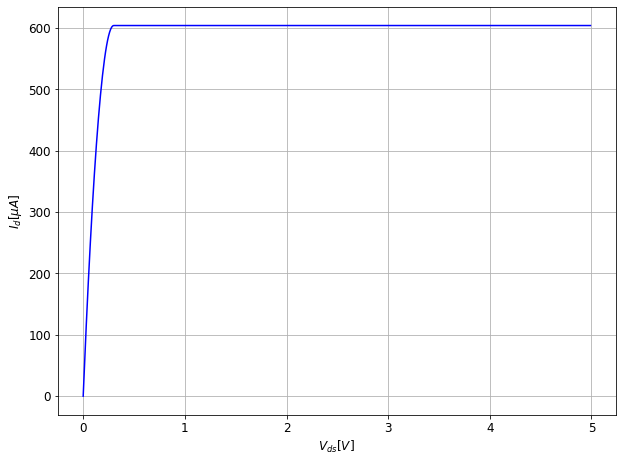

In [66]:
plot_xy(V_ds, 1e6*I_d, r'$V_{ds} [V]$', r'$I_d [\mu A]$')

## Common-source amplifier

## Small-signal gain

 - The input/output relationship is given by
 
\begin{equation}
\Delta V_o = -\dfrac{2I_d}{V_{ov}} \cdot R_D \Delta V_i \left[1 + \dfrac{\Delta V_i}{2V_{ov}} \right]
\end{equation}

 - Assuming $\Delta V_i << 2V_{ov}$, this becomes
 
\begin{equation}
\Delta V_o \approx -\dfrac{2I_d}{V_{ov}}\cdot R_D \Delta V_i
\end{equation}

 - Taking $\Delta V_i$ to be arbitrarily small, we obtain the "small-signal" gain:
 

\begin{equation}
A_v = \dfrac{dV_o}{dV_i} \approx -\dfrac{2I_D}{V_{OV}} \cdot R_D 
\end{equation}

## Small-signal transconductance

 - Instead of having to carry out the linearization process for every new circuit we build, we can linearize at the transistor level
 - As such, the nonlinear function relating $I_d$ to $V_{gs}$ is replaced with a linear transconductance term, $g_m$

### Transconductance versus square law

In [69]:
def nmos_iv(V_gs, W, L):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_th = 0.7                # threshold voltage (device parameter)
    
    I_d = 0.5*u_n*C_ox*(W/L)*(V_gs - V_th)**2 

    return I_d

def g_m(V_GS0, W, L):
    V_th = 0.7                # threshold voltage (device parameter)
    I_D0 = nmos_iv(V_GS0, W, L)
    
    return 2*I_D0/(V_GS0 - V_th)

def gm_line (V_gs, W, L, V_GS0, I_D0):
    return g_m(V_GS0, W, L)*(V_gs - V_GS0) + I_D0

def plot_gm(V_gs, W, L, V_GS1, V_gs_range):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    ax.plot(V_gs, 1e3*nmos_iv(V_gs, W, L), 
            label=r'$\frac{1}{2}\mu C_{ox}\frac{W}{L}(V_{gs}-V_{th})^2$')
    I_D1 = nmos_iv(V_GS1, W, L)
    ax.scatter(V_GS1, 1e3*I_D1, color='C1',s=10)
    ax.plot(V_gs_range, 1e3*gm_line(V_gs_range, W, L, V_GS1, I_D1), 
            'C1--', linewidth=2, label=r'$g_mV_{gs}$')
    ax.set_xlabel(r'$V_{gs} [V]$')
    ax.set_ylabel(r'$I_{D} [mA]$')
    ax.grid()
    ax.legend()

In [70]:
V_gs = np.linspace(0.7,1,num=300)
V_GS1 = 0.9
V_gs_range = np.linspace(V_GS1-0.05, V_GS1+0.05, 10)
plot_gm(V_gs, 1000, 1, V_GS1, V_gs_range)

## Saturation transconductance

 - Transconductance is thus defined as the derivative of drain current with respect to gate-source voltage

\begin{equation}
g_m = \dfrac{\partial I_d}{\partial V_{gs}} = \dfrac{\partial}{\partial V_{gs}} \mu C_{ox} \dfrac{W}{L} (V_{gs} - V_{th})^2 = 2\mu C_{ox} \left(\dfrac{W}{L} \right) (V_{gs} - V_{th})
\end{equation}

 - In saturation, this can be expressed as 

\begin{equation}
g_m = \dfrac{2I_d}{(V_{gs} - V_{th})} = \dfrac{2I_D}{V_{OV}}
\end{equation}

 - Note that for a constant overdrive $g_m$ is linearly dependent on $I_d$

## Dependence of I<sub>d</sub> on V<sub>ds</sub>

<center><img src="MOS_regions.png" width=500 /></center>

 - If we sweep $V_{ds}$ of a real transistor, we see a small dependence of $I_d$ on $V_{ds}$
 - The effect is analogous to the Early effect in BJTs
 - The variation of $I_d$ with $V_{ds}$ is largely due to a decrease in the effective channel length resulting from the high electric field at the drain, and is typically referred to as “channel-length modulation”

## Channel-length modulation

<center><img src="channel_length_modulation.png" width=700 /></center>

 - As $V_{ds}$ increases, the high $E$-field region close to the drain grows, decreasing the effective channel length
 - The reduced channel length increases the drain current, resulting in a positive slope of $I_d$  vs $V_{ds}$  
 - The effect is more pronounced for shorter gate lengths, due to the larger ratio $\Delta L / L$

## Square-law model with channel-length modulation

 - Finite slope of drain current with repsect to $V_{ds}$ is typically attributed to channel-length modulation
 - This is actually the result of a combination of various physical effects (DIBL, SCBE, …)
 - A simple model that assumes a linear increase in $I_d$ with $V_{ds}$ is generally used, where the combination of effects is lumped into a single parameter, $\lambda$, inversely proportional to channel length $L$ ($\lambda \propto 1/L$)
 - The drain current expression is modified to be
 
\begin{equation}
\boxed{I_d = \dfrac{1}{2}\mu\cdot C_{ox} \cdot \dfrac{W}{L}(V_{gs}-V_{th})^2 (1+\lambda V_{ds})}
\end{equation}

## Comments on models

 - The model discussed is often referred to as the “long-channel” or “square-law” model
 - Although it is intuitively satisfying and readily applied analytically, it is grossly inadequate for modeling modern “short-channel” devices
 - To accurately model a wide range of “second-order” effects, a complex transistor model with many empirical parameters, must be used
 - However, the long-channel model is useful for gaining intuition and understanding general performance trends
 - A rule of thumb is useful here:

*Use the simplest model that is accurate enough for the task*